In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

/var/folders/jn/wfpqyzfx0t7cprw54pg29r1h0000gn/T/ipykernel_64191/2348643420.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 
import ezc3d
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy import stats
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [6]:
#import poi data 
poi_metrics = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/poi/poi_metrics.csv")

poi_metrics_copy = poi_metrics.copy() 
poi_metrics_copy.head()

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,elbow_pronation_fp,rotation_hip_shoulder_separation_fp,shoulder_horizontal_abduction_fp,shoulder_abduction_fp,shoulder_external_rotation_fp,lead_knee_extension_angular_velo_fp,lead_knee_extension_angular_velo_br,lead_knee_extension_angular_velo_max,torso_anterior_tilt_fp,torso_lateral_tilt_fp,torso_rotation_fp,pelvis_anterior_tilt_fp,pelvis_lateral_tilt_fp,pelvis_rotation_fp,max_cog_velo_x,torso_rotation_min,max_pelvis_rotational_velo,glove_shoulder_horizontal_abduction_fp,glove_shoulder_abduction_fp,glove_shoulder_external_rotation_fp,glove_shoulder_abduction_mer,elbow_flexion_mer,torso_anterior_tilt_mer,torso_lateral_tilt_mer,torso_rotation_mer,elbow_varus_moment,shoulder_internal_rotation_moment,torso_anterior_tilt_br,torso_lateral_tilt_br,torso_rotation_br,lead_knee_extension_from_fp_to_br,cog_velo_pkh,stride_length,stride_angle,arm_slot,timing_peak_torso_to_peak_pelvis_rot_velo,max_shoulder_horizontal_abduction,shoulder_transfer_fp_br,shoulder_generation_fp_br,shoulder_absorption_fp_br,elbow_transfer_fp_br,elbow_generation_fp_br,elbow_absorption_fp_br,lead_hip_transfer_fp_br,lead_hip_generation_fp_br,lead_hip_absorption_fp_br,lead_knee_transfer_fp_br,lead_knee_generation_fp_br,lead_knee_absorption_fp_br,rear_hip_transfer_pkh_fp,rear_hip_generation_pkh_fp,rear_hip_absorption_pkh_fp,rear_knee_transfer_pkh_fp,rear_knee_generation_pkh_fp,rear_knee_absorption_pkh_fp,pelvis_lumbar_transfer_fp_br,thorax_distal_transfer_fp_br,rear_grf_x_max,rear_grf_y_max,rear_grf_z_max,rear_grf_mag_max,rear_grf_angle_at_max,lead_grf_x_max,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,13.8688,31.5769,53.7302,88.9089,12.4060,160.4524,449.4070,452.7888,-2.6113,-7.0313,0.3425,8.2744,-1.7844,31.7105,3.3113,-21.1062,609.9531,38.3919,85.9397,-46.6380,45.4970,93.9717,16.9991,22.1885,99.4708,141.1720,135.2726,34.1093,16.9053,111.1709,10.1399,0.4643,0.8374,5.3785,39.7377,0.0223,53.8175,471.6631,72.5180,8.1687,481.4378,7.0827,88.0793,48.2958,11.5949,119.5385,70.8131,74.7670,32.1040,130.8791,173.1504,37.6984,33.8403,111.5650,88.4883,157.7995,479.8318,1019.3193,103.0399,1497.9859,1736.0368,55.7071,1278.4966,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,162.8656,88.6095,12.6106,31.2877,55.7340,87.0463,18.5580,300.1992,490.8747,513.3286,-4.2198,-8.5668,3.1764,5.0692,-1.2554,33.9670,3.2385,-23.6528,639.6493,42.5471,85.2882,-47.7522,45.2598,93.6559,14.1951,23.5327,98.4928,144.5483,138.5700,33.9700,18.7871,112.8332,14.8421,0.4367,0.8316,1.1214,42.9766,0.0139,55.9667,468.4177,66.5717,9.3845,474.0084,6.4195,81.1477,65.9816,12.0415,110.9249,89.3801,67.1017,23.9261,125.1987,180.7929,40.8556,28.0193,109.6130,104.7412,170.3120,477.8022,989.5197,109.2064,1502.8258,1728.0176,60.2863,1436.1255,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,158.8107,121.7674,30.4130,31.7880,47.1102,95.6806,5.7281,-176.7390,318.5102,333.5518,-3.6689,-4.9416,-9.6014,9.5675,-1.9345,22.1156,2.9110,-31.6853,881.1570,46.9422,81.8611,-33.7316,28.7365,83.8787,31.2288,29.1355,129.9182,132.9853,129.8250,45.1741,21.1152,142.5116,26.2749,0.2008,0.8133,7.9460,49.1484,0.0250,49.0236,307.9884,7.2968,54.3387,301.6148,7.7581,24.0842,133.6156,4.6376,106.6119,136.0782,69.9222,26.2777,56.0486,146.2910,62.6569,51.9809,28.8661,25.1778,176.2563,361.8390,681.3699,114.3219,1094.7686,1283.0751,58.3164,957.3923,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,155.2244,124.6367,27.9551,27.9139,46.6610,94.4698,1

## first come up wtih an upper half score no rotational things yet..might have to go through and edit these, but for now these are going to be our arm action variables

shoulder_horizontal_abduction_fp
shoulder_abduction_fp
shoulder_external_rotation_fp
max_shoulder_external_rotation 
max_elbow_flexion
elbow_flexion_fp
elbow_pronation_fp

In [77]:

# Selecting relevant features and target variable
arm_action_features = poi_metrics_copy[['shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp', 
                 'shoulder_external_rotation_fp', 'max_shoulder_external_rotation', 
                 'max_elbow_flexion', 'elbow_flexion_fp', 'elbow_pronation_fp']]

arm_action_target = poi_metrics_copy['pitch_speed_mph']

# Checking for missing values
missing_values = arm_action_features.isnull().sum()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(arm_action_features, arm_action_target, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape

(shoulder_horizontal_abduction_fp    0
 shoulder_abduction_fp               0
 shoulder_external_rotation_fp       0
 max_shoulder_external_rotation      0
 max_elbow_flexion                   0
 elbow_flexion_fp                    0
 elbow_pronation_fp                  0
 dtype: int64,
 (328, 7),
 (83, 7))

In [86]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

num_boost_round = 100
arm_action = xgb.train(params, dtrain, num_boost_round)


In [87]:
y_pred_xgb = arm_action.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

Root Mean Squared Error: 3.0735190920851614


<Figure size 1000x700 with 0 Axes>

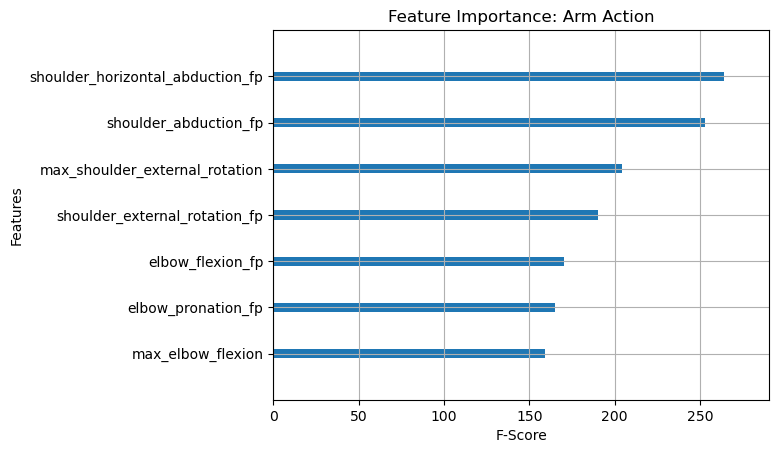

In [102]:
# Calculate and print RMSE
rmse_xgb = np.sqrt(mse_xgb)
print(f"Root Mean Squared Error: {rmse_xgb}")

# Plot Feature Importance
plt.figure(figsize=(10, 7))
xgb.plot_importance(arm_action,importance_type='weight',show_values=False)
plt.title('Feature Importance: Arm Action')
plt.ylabel('Features')
plt.xlabel('F-Score')
plt.show()


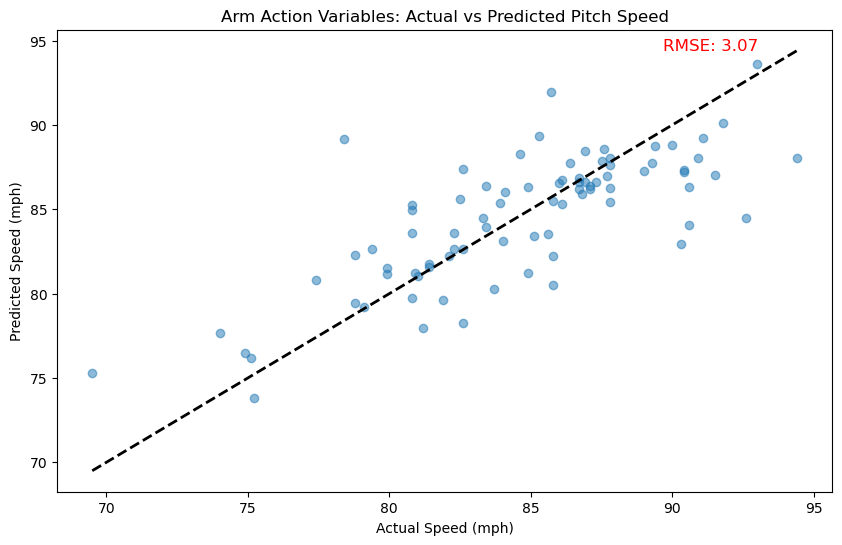

In [89]:
#visualize actual vs predicted mph

comparison_velo = pd.DataFrame({
    'Actual Speed (mph)': y_test,
    'Predicted Speed (mph)': y_pred_xgb
})

# Calculate RMSE for the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(comparison_velo['Actual Speed (mph)'], comparison_velo['Predicted Speed (mph)'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction

x_text = y_test.max() * .95  # 95% of the max value
y_text = y_test.max() * 1  # 80% of the max value

plt.text(x_text, y_text, f'RMSE: {rmse:.2f}', fontsize=12, color='red')
plt.xlabel('Actual Speed (mph)')
plt.ylabel('Predicted Speed (mph)')
plt.title('Arm Action Variables: Actual vs Predicted Pitch Speed')
plt.show()


In [92]:
#save model
file_path = '/Users/EmilioMartinez_1/Desktop/arm_action_model.pkl'  # Replace with your actual file path

# Save the model using pickle
with open(file_path, 'wb') as file:
    pickle.dump(arm_action, file)

In [103]:

#prepare the full dataset for predictions
X_full = poi_metrics_copy[model_features]
full_data_dmatrix = xgb.DMatrix(X_full)
y_pred_xgb = arm_action.predict(full_data_dmatrix)

# Get feature importances from the trained model
feature_importances = arm_action.get_score(importance_type='weight')
total_importance = sum(feature_importances.values())
normalized_importances = {k: v / total_importance for k, v in feature_importances.items()}

# Function to get pitcher data by session_pitch
def get_pitcher_data_by_session(dataset, session_pitch, features):
    """
    Extracts pitcher data for a given session_pitch from the dataset.
    """
    pitcher_data = dataset[dataset['session_pitch'] == session_pitch]
    if pitcher_data.empty:
        raise ValueError(f"No data found for session_pitch '{session_pitch}'")
    return pitcher_data[features].iloc[0]

# Specify the session_pitch_id to analyze
session_pitch_id = '2843_5'  # Replace with the actual session_pitch ID

try:
    # Retrieve pitcher data for the specified session_pitch_id
    pitcher_data = get_pitcher_data_by_session(poi_metrics_copy, session_pitch_id, model_features)

    # Calculate Percentiles and Impact on Velocity
    percentiles = {variable: stats.percentileofscore(poi_metrics_copy[variable], pitcher_data[variable]) 
                   for variable in model_features}
    impact_on_velocity = {variable: (pitcher_data[variable] - poi_metrics_copy[variable].median()) * normalized_importances.get(variable, 0)
                          for variable in model_features}

    # Combine and display percentiles and impact on velocity
    percentiles_df = pd.DataFrame(list(percentiles.items()), columns=['Feature', 'Percentile'])
    impact_on_velocity_df = pd.DataFrame(list(impact_on_velocity.items()), columns=['Feature', 'Impact on Velocity'])
    combined_df = pd.merge(percentiles_df, impact_on_velocity_df, on='Feature')
    print("Pitcher Analysis for session_pitch:", session_pitch_id)
    print(combined_df)

    # Find actual vs predicted velocity
    actual_velocity = poi_metrics_copy[poi_metrics_copy['session_pitch'] == session_pitch_id]['pitch_speed_mph'].iloc[0]
    predicted_velocity = y_pred_xgb[poi_metrics_copy.index[poi_metrics_copy['session_pitch'] == session_pitch_id][0]]
    print("\nActual Pitch Speed (mph):", actual_velocity.round(2))
    print("Predicted Pitch Speed (mph):", predicted_velocity.round(2))

except ValueError as e:
    print(e)


Pitcher Analysis for session_pitch: 2843_5
                            Feature  Percentile  Impact on Velocity
0  shoulder_horizontal_abduction_fp   97.323601            3.892450
1             shoulder_abduction_fp   54.501217            0.177838
2     shoulder_external_rotation_fp   24.087591           -1.923125
3    max_shoulder_external_rotation   22.871046           -0.948593
4                 max_elbow_flexion   70.072993            0.417202
5                  elbow_flexion_fp   51.581509            0.067976
6                elbow_pronation_fp   72.749392            1.175058

Actual Pitch Speed (mph): 86.2
Predicted Pitch Speed (mph): 86.21


### Impact on Velocity for a Feature=(Pitcher’s Feature Value−Median of Feature) × Feature Importance

### This calculation provides an estimate of the influence each feature has on the pitch velocity for a specific pitcher. A positive value suggests that the pitcher's particular value for that feature is likely to increase pitch velocity, while a negative value suggests a decrease. The magnitude of the value indicates the strength of the impact.



In [97]:
# Convert y_pred_xgb to a Pandas Series for ease of operation
predicted_velocities = pd.Series(y_pred_xgb, index=poi_metrics_copy.index)

# Calculate the absolute difference between actual and predicted velocities
poi_metrics_copy['predicted_velocity'] = predicted_velocities
poi_metrics_copy['velocity_difference'] = abs(poi_metrics_copy['pitch_speed_mph'] - poi_metrics_copy['predicted_velocity'])

# Sort the data by the difference and select the top 10
top_differences = poi_metrics_copy.sort_values(by='velocity_difference', ascending=False).head(10)

# Display the top 10 differences
print("Top 10 Differences in Actual vs Predicted Velocities:")
print(top_differences[['session_pitch', 'pitch_speed_mph', 'predicted_velocity', 'velocity_difference']])


Top 10 Differences in Actual vs Predicted Velocities:
    session_pitch  pitch_speed_mph  predicted_velocity  velocity_difference
218        2889_3             78.4           89.171013            10.771013
268        2935_4             92.6           84.495743             8.104257
33         1562_2             90.3           82.925560             7.374440
380        3228_4             90.6           84.089661             6.510339
239        2916_4             94.4           88.048172             6.351828
55         1623_2             85.7           91.924583             6.224583
22         1393_3             69.5           75.315468             5.815468
113        2655_2             85.8           80.522820             5.277180
280        2979_3             82.6           87.365433             4.765433
194        2859_2             91.5           87.040726             4.459274
